In [145]:
import csv
import numpy as np

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.linear_model import SGDClassifier

import matplotlib.pyplot as plt
%matplotlib inline

def spellProcessor(word):
    word = word.lower()
    word = word.replace("gyftis", "gifts")
    word = word.replace("gether", "gather")
    word = word.replace("spirituall", "spiritual")
    word = word.replace("feythfull", "faith")
    word = word.replace("wytnes", "witness")
    word = word.replace("almes", "alms")
    word = word.replace("desyre", "desire")
    word = word.replace("selfe", "self")
    word = word.replace("saffely", "safely")
    word = word.replace("realme", "realm")
    word = word.replace("acte", "act")
    word = word.replace("fourme", "form")
    word = word.replace("subiectes", "subjects")
    word = word.replace("theyr", "their")
    word = word.replace("kynde", "kind")
    word = word.replace("kynge", "king")
    word = word.replace("kyndes", "kinds")
    word = word.replace("vpon", "unto")
    word = word.replace("purueyours", "purveyors")
    word = word.replace("highnes", "highness")
    word = word.replace("euery", "every")
    word = word.replace("quene", "queen")
    word = word.replace("quenes", "queens")
    word = word.replace("whiche", "which")
    word = word.replace("bloude", "blood")
    word = word.replace("soueraine", "sovereign")
    word = word.replace("enactd", "enacted")
    word = word.replace("vs", "us")
    return word

stopWords = [",","the","and","of","or","to","in","shall","be","that","any","by",".",
              "such","as","this","for","same","all","said","other","'s",";",
              "her","is","every","[","]","they","within", "our", "not", "so",
              "made", "no", "then", ":", "do", "from", "if", "it", "which", "at", "with",
             "thereof","upon", "a", "because", "used", "some", "but", "aforesaid", "also",
             ")","(", "what", "&", "may", "are", "their", "them", "sayde", "suche", "shalbe", "anye", "sayd",
             "thesaid", "/", "...", "/", "either", "haue", "vnto", "thy", "did", "was", "were", "have", "thee", 
             "your", "thou", "unto", "11", "hath", "had", "went", "10"]

In [146]:
input_data = list()
row_count = 0

metadata=list()
with open('../texts/textMetadata.csv', 'rt') as csvfile:
    reader = csv.reader(csvfile)
    for row in reader:
        # deal with the header
        if row_count != 0:
            metadata.append(row)   
        row_count += 1
print("read",row_count,"lines")

read 30 lines


In [147]:
metadata[0]

['crown/RoyalProclamation_HenryVIII_1520.txt',
 'Royal Proclamation',
 '1520',
 'Henry VIII',
 'Crown']

In [148]:
labels = [i[4] for i in metadata]
files = list()
for i in metadata:
    fn = "../texts/" + i[0]
    files.append(fn)
    
vectorizer = CountVectorizer(
    input='filename',
    lowercase=True,
    ngram_range=(1,3),
    strip_accents=None, preprocessor=spellProcessor, stop_words=stopWords)

In [149]:
# get document term matrix
dtm = vectorizer.fit_transform(files)

# convert to tf-idf frequencies (to account for differences in text lengths)
tfidf_transformer = TfidfTransformer()
dtm_tfidf = tfidf_transformer.fit_transform(dtm)

In [150]:
# attempt to deal with imbalanced dataset

for c in set(labels):
    print("Class: {0}, Documents: {1}".format(c,labels.count(c)))

from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight('balanced',
                                     np.unique(labels),
                                     labels)

Class: Crown, Documents: 25
Class: Church, Documents: 4


In [151]:
# create and fit model using Support Vector Machine (SVM)
clf = SGDClassifier(tol=None,class_weight="balanced",max_iter=1000).fit(dtm_tfidf, labels)

In [152]:
# this function will return total count of a term in the vocabulary
def get_counts(term):
    widx = vectorizer.vocabulary_[term]
    return(vocab_sums[0,widx])

In [153]:
# what are our top terms?
vocab_sums = dtm.sum(axis=0)
sorted_vocab = [(v, vocab_sums[0, i]) for v, i in vectorizer.vocabulary_.items()]
sorted_vocab = sorted(sorted_vocab, key = lambda x: x[1], reverse=True)

# display top twenty words
for i in range(1,20):
    print(sorted_vocab[i][0],"->",sorted_vocab[i][1])

his -> 10341
lord -> 8823
him -> 8026
god -> 5120
my -> 4875
me -> 4539
will -> 4437
ye -> 4320
when -> 3506
man -> 3274
king -> 3255
out -> 3238
you -> 2859
there -> 2817
israel -> 2807
up -> 2804
son -> 2709
people -> 2605
into -> 2447


In [154]:
feature_names = vectorizer.get_feature_names()
terms = np.argsort(clf.coef_[0])
values = clf.coef_.ravel()[np.argsort(clf.coef_.ravel())]
print("Key features for {}:".format(clf.classes_[0]))
word_cloud_data = list()
for i, t in enumerate(terms):
    # reverse sign
    v = -np.round(values[i],3)
    word_cloud_data.append((feature_names[t],v))
    if i < 50:
        print("{0} ({1})".format(feature_names[t],v),end=", ")

Key features for Church:
him (1.229), he (1.057), lord (0.602), priest (0.554), son (0.541), john (0.486), procession (0.462), cross (0.449), me (0.408), christ (0.394), jesus (0.376), sing (0.371), my (0.364), holy (0.36), us (0.347), jesus christ (0.346), singing (0.307), when (0.283), sins (0.28), who (0.261), she (0.252), church yard (0.251), sing procession (0.251), lacey (0.251), yard (0.251), john lacey (0.251), about church yard (0.251), father (0.241), world (0.231), answer him (0.225), saying (0.222), about church (0.218), about (0.213), came (0.206), his (0.206), christ lord (0.202), stayed (0.194), clerks (0.194), give (0.193), answer (0.192), heaven (0.192), say (0.191), communion (0.191), israel (0.188), amen (0.185), man (0.185), up (0.182), through (0.18), grace (0.177), commandment (0.177), 

In [155]:
# reduce data
viz_words = word_cloud_data[:25]+ word_cloud_data[-25:]

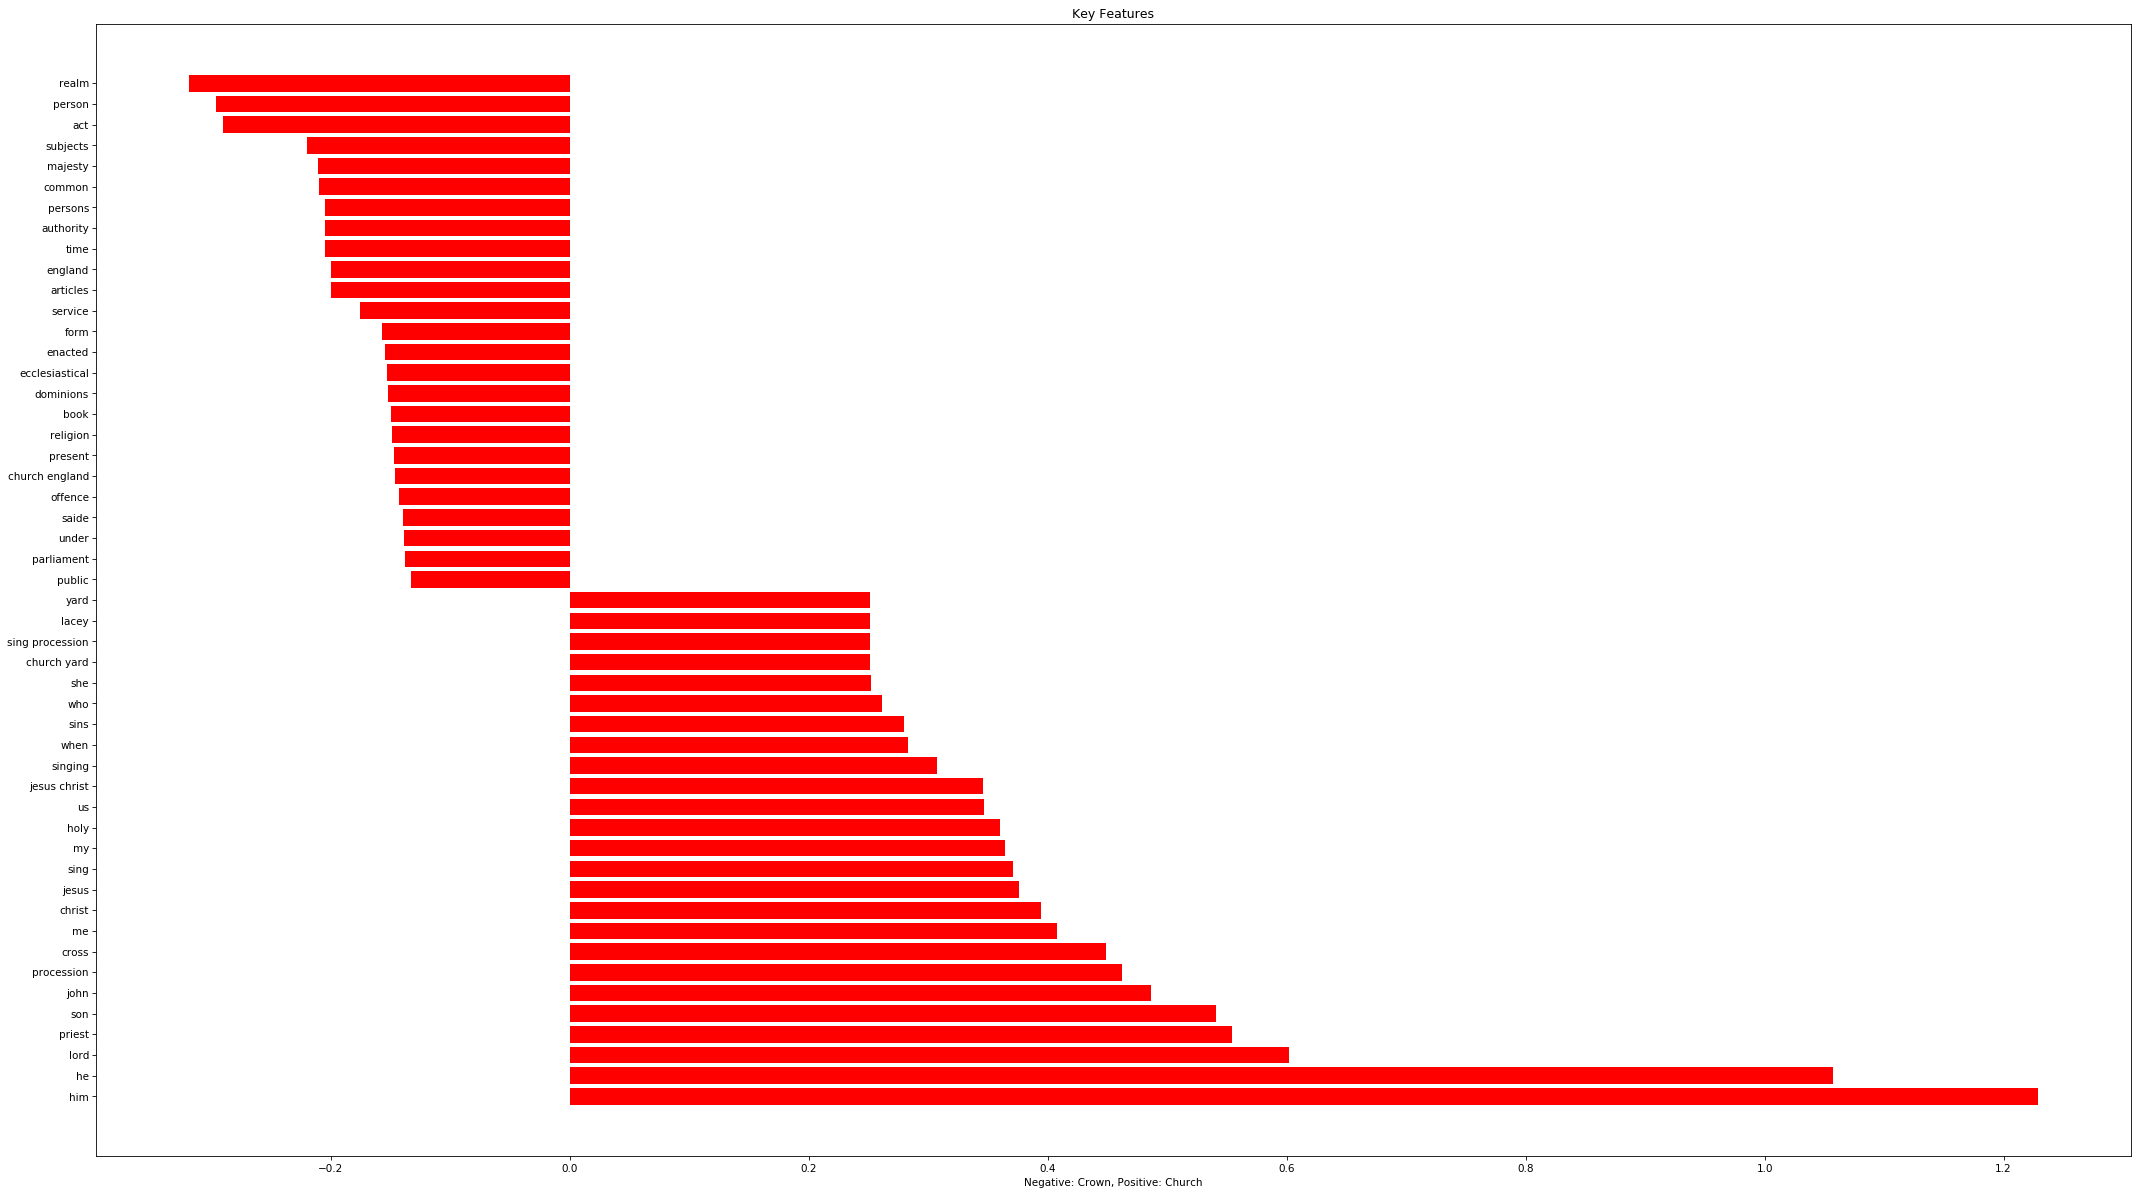

In [156]:
values = [x[1] for x in viz_words]
kwords = [x[0] for x in viz_words]
y_pos = range(len(values))

#fig, ax = plt.subplots()
fig = plt.figure(figsize=(35, 20), dpi=75)
plt.barh(y_pos, values, align='center',tick_label=kwords,color="red")
plt.title("Key Features")
plt.xlabel("Negative: Crown, Positive: Church")
plt.show()

In [144]:
from wordcloud import WordCloud

# show most important features for classification of class Church
fig = plt.figure(figsize=(35, 20), dpi=75)
wordcloud = WordCloud(width=900,height=500, max_words=1000,
                      relative_scaling=1).generate_from_frequencies(word_cloud_data)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

AttributeError: 'list' object has no attribute 'items'

<Figure size 2625x1500 with 0 Axes>

### 